#Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

# Showing information about the dataset 

In [ ]:
builder = tfds.builder('mnist_corrupted')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist_corrupted',
    version=1.0.0,
    description='MNISTCorrupted is a dataset generated by adding 15 corruptions to the test
images in the MNIST dataset. This dataset wraps the static, corrupted MNIST
test images uploaded by the original authors',
    homepage='https://github.com/google-research/mnist-c',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{mu2019mnist,
      title={MNIST-C: A Robustness Benchmark for Computer Vision},
      author={Mu, Norman and Gilmer, Justin},
      journal={arXiv preprint arXiv:1906.02337},
      year={2019}
    }""",
    redistribution_info=,
)



#Splitting dataset to train and test

In [ ]:
ds_train = tfds.load('mnist_corrupted', split="train")
ds_test = tfds.load('mnist_corrupted', split="test")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0.incomplete4MVTB0/mnist_corrupted-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0.incomplete4MVTB0/mnist_corrupted-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset mnist_corrupted downloaded and prepared to /root/tensorflow_datasets/mnist_corrupted/identity/1.0.0. Subsequent calls will reuse this data.


#Preprocessing the dataset

In [ ]:
train_images = np.array([example['image'].numpy()[:,:] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train]) #0 for single color#

test_images = np.array([example['image'].numpy()[:,:] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

type(test_images[0])
train_images.shape

In [ ]:
train_images = train_images.reshape(60000, 28, 28, 1) #1 for telling Keras library it's greyScale
test_images = test_images.reshape(10000, 28, 28, 1)

train_images = train_images.astype('float32') #instead of 'uint8' which is the default to be able to convert values => 0 to 1 instead of from 0 to 255
test_images = test_images.astype('float32')

train_images /= 255  #to make all values between 0 and 1 bec the maximum value in RGB = 255
test_images /= 255 

train_images[0]

#Building the CNN model

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 5, strides=(1,1), input_shape = (28, 28, 1), activation = 'relu'),
    keras.layers.AveragePooling2D(2, strides =(2,2),),
    keras.layers.Conv2D(64, 5, activation = 'relu'),
    keras.layers.AveragePooling2D(2, strides =(2,2)),
    keras.layers.Conv2D(32, 2, activation = 'relu'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics =['accuracy']) #keras function to config the model with loss and metrices

history = model.fit(train_images, train_labels, validation_split = 0.2 , epochs=5, batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3446 - accuracy: 0.8918 - val_loss: 0.1397 - val_accuracy: 0.9581
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1135 - accuracy: 0.9653 - val_loss: 0.0796 - val_accuracy: 0.9753
Epoch 3/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0782 - accuracy: 0.9756 - val_loss: 0.0628 - val_accuracy: 0.9808
Epoch 4/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.0611 - val_accuracy: 0.9799
Epoch 5/5
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0504 - accuracy: 0.9852 - val_loss: 0.0653 - val_accuracy: 0.9793


#Evaluating on test set

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0341 - accuracy: 0.9892


[0.03405771031975746, 0.9891999959945679]

# Plotting accuracy and loss graphs

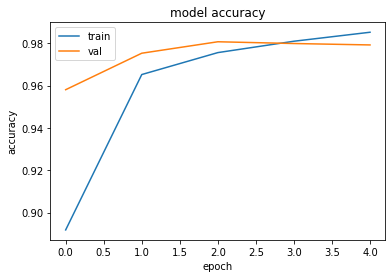

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

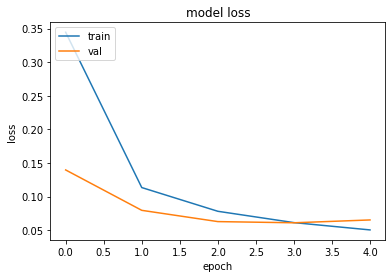

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()